![Alt text](image-1.png)
 ![Alt text](image.png)

 Kamila:202214959
 
 Cristian 202113643

In [1]:
import pandas as pd

puerto_e1={'nombre_puerto':'Alto de patios-Bogota',
            'Distancia[km]':5.91,
            'Elevación máxima [msnm]':3022,
            'Elevación mínima [msnm]':2612,
            'Elevación ganada [msnm]':410,
            'Pendiente promedio[%]':6.9,
            'Mejor tiempo Strava [min]':14.733}
puerto_e2={'nombre_puerto':'Alto de patios-Teusacá',
            'Distancia[km]':2.98,
            'Elevación máxima [msnm]':3019,
            'Elevación mínima [msnm]':2818,
            'Elevación ganada [msnm]':233,
            'Pendiente promedio[%]':6.7,
            'Mejor tiempo Strava [min]':6.400}
df=[puerto_e1,puerto_e2]
df=pd.DataFrame(df)

df

,nombre_puerto,Distancia[km],Elevación máxima [msnm],Elevación mínima [msnm],Elevación ganada [msnm],Pendiente promedio[%],Mejor tiempo Strava [min]
0,Alto de patios-Bogota,5.91,3022,2612,410,6.9,14.733
1,Alto de patios-Teusacá,2.98,3019,2818,233,6.7,6.400


![Alt text](image-2.png)



In [2]:
Vgs = #ground speed
Cd_A= 0.35 #coeficiente de arrastre
w = 83.50 # kg
Vhw = 0
Crr = 0.005 
loss_dt= 2 #[%] 
p = 0 #de acuerdo a criterio ingenieril
C= (g*W*sin(alpha))+(g*w*cos(alpha)*Crr)
Potencia=Vgs()

SyntaxError: invalid syntax (2990450665.py, line 1)

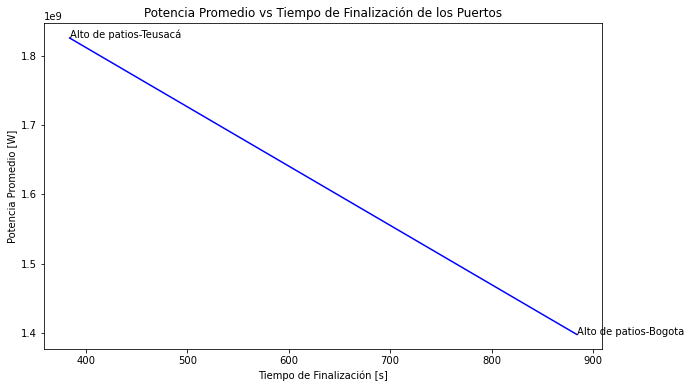

In [12]:
#Intento 1
import matplotlib.pyplot as plt

# Valores iniciales
CdA = 0.35
W = 83.50  # kg
V_hwww = 0  # m/s
Cg = 0.005
L_rrrr = 2  # %
rho = 1.225  # kg/m^3
g=9.81

# Calcular la potencia promedio requerida
df['Mejor tiempo Strava [s]'] = df['Mejor tiempo Strava [min]'] * 60
df['Potencia Promedio [W]'] = ((1 - L_rrrr / 100) ** -1) * (g * W * (df['Elevación ganada [msnm]'] / df['Distancia[km]']) +
        0.5 * CdA * rho * (df['Distancia[km]'] * 1000) * (df['Mejor tiempo Strava [s]'] / 3600 + V_hwww) ** 2
    ) * (df['Distancia[km]'] * 1000) / (df['Mejor tiempo Strava [s]'] / 3600)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['Mejor tiempo Strava [s]'], df['Potencia Promedio [W]'], color='blue')
plt.title('Potencia Promedio vs Tiempo de Finalización de los Puertos')
plt.xlabel('Tiempo de Finalización [s]')
plt.ylabel('Potencia Promedio [W]')

# Añadir etiquetas de los puertos
for i, txt in enumerate(df['nombre_puerto']):
    plt.annotate(txt, (df['Mejor tiempo Strava [s]'][i], df['Potencia Promedio [W]'][i]))

plt.show()


In [7]:
"""
#potencia promedio del ciclista (237 W),utilizamos la ecuación de potencia para calcular el tiempo de finalización:

Potencia Promedio = (Trabajo_Total)/(Tiempo_Total):

Tiempo_total= (Trabajo_total)/(Potencia_promedio) 
            = (Distancia)/(Potencia_promedio)
            = (Distancia)/237
 
Vamos a calcular el tiempo de finalización para cada puerto:
"""
# Calcular tiempo de finalización para cada puerto
df['Tiempo Total [s]'] = (df['Distancia[km]'] * 1000) / 237

df[['nombre_puerto', 'Tiempo Total [s]']]


,nombre_puerto,Tiempo Total [s]
0,Alto de patios-Bogota,24.936709
1,Alto de patios-Teusacá,12.573840


In [13]:
# Intento 2
import math

# Variables
weight = 70 # kg
pendiente = 5 # %
densidad = 1.2 # kg/m^3
area = 0.5 # m^2
coeficiente_resistencia_rodadura = 0.005
coeficiente_arrastre = 0.7
velocidad_viento = 0 # m/s

# Fuerzas
gravedad = 9.81 * weight * math.sin(math.atan(pendiente/100))
fuerza_resistencia_rodadura = 9.81 * weight * math.cos(math.atan(pendiente/100)) * coeficiente_resistencia_rodadura
fuerza_arrastre = 0.5 * coeficiente_arrastre * area * densidad * (velocidad_viento**2) / (1.0**2)

total_force = gravedad + fuerza_resistencia_rodadura + fuerza_arrastre

# Calculo potencia requerida
ground_speed = 10 # m/s
power_required = total_force * ground_speed

# Calculo eficiencia
powertrain_efficiency = 0.95

# Calculo potencia en los pedales
power_at_pedals = power_required / (1 - powertrain_efficiency/100)


p_l = power_at_pedals / (ground_speed**3)



<Punto 2>

In [18]:
#PUNTO 2 intento 1

import sympy as sp

# Variables
Q, t, L, R, C, V = sp.symbols('Q, t, L, R, C, V')

# Ecuaciones
eq1 = L*sp.diff(Q, t, t) + R*sp.diff(Q, t) + Q/(C) - V
eq2 = sp.diff(Q, t) - sp.diff(V, t)

# Solve para la derivada de orden superior
derivada_orden_superior = sp.solve(eq2, sp.diff(Q, t))[0]

# Sustituye la ec2 por la ec1 y resuelve la derivada de orden superior
eq3 = eq1.subs(sp.diff(Q, t), derivada_orden_superior)
eq3 = sp.simplify(eq3)
coefficients = sp.Poly(eq3, derivada_orden_superior).coeffs()

# Función que devuelve la primera y la segunda derivada
def derivadas(Q, t, L, R, C, V):
    dQdt = sp.diff(Q, t)
    d2Qdt2 = sp.diff(dQdt, t)
    return dQdt, d2Qdt2

#-------------------------------------------------------
#PUNTO 2 intento 2
import numpy as np
from scipy.integrate import odeint

def derivadas(Q, t, L, R, C, V):
    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)
    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación del circuito en términos de I
    
    return [dQdt, dIdt]

def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    # Resuelve el sistema de ecuaciones diferenciales
    sol = odeint(derivadas, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[0]  # Carga Q(t)
    I = sol[:, 1]  # Corriente I(t)
    
    return Q, I, np.gradient(Q, t), np.gradient(np.gradient(Q, t), t)

#---------------------------------------------------------------------
#PUNTO 2 intento 3
import matplotlib.pyplot as plt

# Definir parámetros y condiciones iniciales
L = 1.0  # Inductancia en Henrys
R = 0.5  # Resistencia en Ohms
C = 0.2  # Capacitancia en Farads

# Función de voltaje V(t)
def V(t):
    return np.sin(t)  # Ejemplo: una senoidal

Q0 = 0.0  # Condición inicial de carga
I0 = 0.0  # Condición inicial de corriente

# Definir el arreglo de tiempos
t = np.linspace(0, 10, 1000)

# Resolver el circuito RLC
Q, I, dQ_dt, d2Q_dt2 = resolver_circuito_RLC(L, R, C, V, Q0, I0, t)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, Q, label='Carga (Q)')
plt.plot(t, I, label='Corriente (I)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, dQ_dt, label='Primera derivada de Q')
plt.plot(t, d2Q_dt2, label='Segunda derivada de Q')
plt.legend()
plt.show()

#-----------------------------------------------------------------------
#PUNTO 2 intento 4
#sol prexpl

# Define the variables
Q, t, L, R, C, V = sp.symbols('Q t L R C V')

# Define the equations
eq1 = L*sp.diff(Q, t, t) + R*sp.diff(Q, t) + Q/(C) - V
eq2 = sp.diff(Q, t) - sp.diff(V, t)

# Specify the initial conditions
I0 = 0
V0 = 10

# Define the function that returns the first and second derivative
def derivatives(Q, t, L, R, C, V):
    dQdt = sp.diff(Q, t)
    d2Qdt2 = sp.diff(dQdt, t)
    return dQdt, d2Qdt2

# Define the time step
timesteps = np.linspace(0, 20, 1000)

# Solve the differential equation
sol = sp.dsolve(eq1, Q, ics={Q.subs(t, 0): 0, sp.diff(Q, t).subs(t, 0): I0})

# Evaluate the solution at the specified time step
Q_values = [sol.rhs.subs([(L, 1), (R, 1), (C, 1), (V, V0), (t, timestep)]) for timestep in timesteps]

# Plot the results
plt.plot(timesteps, Q_values)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()

ValueError: when 1d, distances must match the length of the corresponding dimension

In [10]:
"""
def circuito_RLC(Q, t, L, R, C, V):
    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)
    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación del circuito en términos de I
    
    return [dQdt, dIdt]
def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    # Resuelve el sistema de ecuaciones diferenciales
    sol = odeint(circuito_RLC, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[:, 0]  # Carga Q(t)
    I = sol[:, 1]  # Corriente I(t)
    
    # Calcular derivadas
    dQ_dt = np.gradient(Q, t)
    d2Q_dt2 = np.gradient(dQ_dt, t)
    
    return Q, I, dQ_dt, d2Q_dt2
# Definir parámetros y condiciones iniciales
L = 1.0  # Inductancia en Henrys
R = 0.5  # Resistencia en Ohms
C = 0.2  # Capacitancia en Farads

# Función de voltaje V(t)
#Para el primer caso, con I(0)=0 y V(0)=10:

def V1(t):
    return 10.0  # Constante 10 V

Q0a = 0.0  # Condición inicial de carga
I0a = 0.0  # Condición inicial de corriente

# Definir el arreglo de tiempos
t = np.linspace(0, 20, 1000)

# Resolver el circuito RLC
Qa, Ia, dQ_dt_a, d2Q_dt2_a = resolver_circuito_RLC(L, R, C, V1, Q0a, I0a, t)

# Función de voltaje V(t)
#Para el segundo caso, con I(0)=2 V(0)=0:

def V2(t):
    return 0.0  # Constante 0 V

Q0b = 0.0  # Condición inicial de carga (será sobreescrita por la condición de I(0))
I0b = 2.0  # Condición inicial de corriente

# Resolver el circuito RLC
Qb, Ib, dQ_dt_b, d2Q_dt2_b = resolver_circuito_RLC(L, R, C, V2, Q0b, I0b, t)

"""

'\ndef circuito_RLC(Q, t, L, R, C, V):\n    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)\n    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación del circuito en términos de I\n    \n    return [dQdt, dIdt]\ndef resolver_circuito_RLC(L, R, C, V, Q0, I0, t):\n    # Resuelve el sistema de ecuaciones diferenciales\n    sol = odeint(circuito_RLC, [Q0, I0], t, args=(L, R, C, V))\n    Q = sol[:, 0]  # Carga Q(t)\n    I = sol[:, 1]  # Corriente I(t)\n    \n    # Calcular derivadas\n    dQ_dt = np.gradient(Q, t)\n    d2Q_dt2 = np.gradient(dQ_dt, t)\n    \n    return Q, I, dQ_dt, d2Q_dt2\n# Definir parámetros y condiciones iniciales\nL = 1.0  # Inductancia en Henrys\nR = 0.5  # Resistencia en Ohms\nC = 0.2  # Capacitancia en Farads\n\n# Función de voltaje V(t)\n#Para el primer caso, con I(0)=0 y V(0)=10:\n\ndef V1(t):\n    return 10.0  # Constante 10 V\n\nQ0a = 0.0  # Condición inicial de carga\nI0a = 0.0  # Condición inicial de corriente\n\n# Definir el arreglo de tiempos\nt = np.lins

![Alt text](<Imagen de WhatsApp 2023-10-01 a las 12.43.07_28551e7c.jpg>)

Punto 2

"item 1 & 2 Documentado"

In [20]:
import numpy as np
from scipy.integrate import odeint

def ecuaciones_circuito_RLC(Q, t, L, R, C, V):
    """
    Resuelve las ecuaciones diferenciales para un circuito RLC.
    
    Args:
        Q (list): Lista con dos elementos [Q, I] representando la carga y la corriente.
        t (numpy.ndarray): Arreglo de tiempos.
        L (float): Inductancia en Henrys.
        R (float): Resistencia en Ohms.
        C (float): Capacitancia en Farads.
        V (function): Función que retorna el voltaje en función del tiempo.

    Returns:
        list: Lista con las derivadas de Q y I en el instante t.

    """
    dQdt = Q[1]  # La primera derivada de Q es la corriente (I)
    dIdt = (V(t) - Q[0]/C - R*Q[1])/L  # Ecuación del circuito en términos de I
    
    return [dQdt, dIdt]

def resolver_circuito_RLC(L, R, C, V, Q0, I0, t):
    """
    Resuelve el circuito RLC y calcula la carga, la corriente y sus derivadas.

    Args:
        L (float): Inductancia en Henrys.
        R (float): Resistencia en Ohms.
        C (float): Capacitancia en Farads.
        V (function): Función que retorna el voltaje en función del tiempo.
        Q0 (float): Condición inicial de carga.
        I0 (float): Condición inicial de corriente.
        t (numpy.ndarray): Arreglo de tiempos.

    Returns:
        tuple: (Q, I, dQ_dt, d2Q_dt2), donde:
            Q (numpy.ndarray): Carga en función del tiempo.
            I (numpy.ndarray): Corriente en función del tiempo.
            dQ_dt (numpy.ndarray): Primera derivada de la carga en función del tiempo.
            d2Q_dt2 (numpy.ndarray): Segunda derivada de la carga en función del tiempo.

    """
    sol = odeint(ecuaciones_circuito_RLC, [Q0, I0], t, args=(L, R, C, V))
    Q = sol[:, 0]  # Carga Q(t)
    I = sol[:, 1]  # Corriente I(t)
    
    dQ_dt = np.gradient(Q, t)
    d2Q_dt2 = np.gradient(dQ_dt, t)
    
    return (Q, I, dQ_dt, d2Q_dt2)

Caso A:

I(0) = 0

V(0) = 10

In [17]:
# Especificación de las variables
L = 1.0  # Inductancia en Henrys
R = 0.5  # Resistencia en Ohms
C = 0.2  # Capacitancia en Farads

# Definición de la función de voltaje V(t)
def V(t):
    return 10.0  # Constante 10 V

# Condiciones iniciales
Q0a = 0.0  # Condición inicial de carga
I0a = 0.0  # Condición inicial de corriente

# Intervalo de tiempo de 0 a 20 segundos
t = np.linspace(0, 20, 1000)

# Resolver el circuito RLC
Qa, Ia, dQ_dt_a, d2Q_dt2_a = resolver_circuito_RLC(L, R, C, V, Q0a, I0a, t)

#print(resolver_circuito_RLC(L, R, C, V, Q0a, I0a, t))
